In [1]:
# Grover's search Algorithm:

In [2]:
#initializing:
import numpy as np 

#import some qiskit work tools:
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *

#import visualization tools:
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

In [3]:
## Circuit for winning state 00:

In [4]:
### Step 1: State preparation and settings:

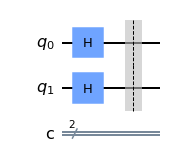

In [5]:
n = 2 #number of qubits
winning_element = "00"

grover_00 = QuantumCircuit(n, n)

for qubit in range(n):
    grover_00.h(qubit)
    
#Add a barrier:
grover_00.barrier()

#Draw a circuit:
grover_00.draw()

In [6]:
### Step 2:Design the Phase Oracle

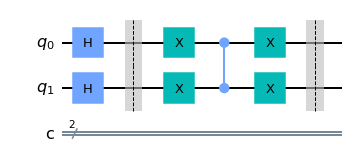

In [7]:
#Apply the X gates:
for qubit in range(n):
    grover_00.x(qubit)
    
#Applying the CZ gate:
grover_00.cz(1, 0)

#Apply the X gates to reset:
for qubit in range(n):
    grover_00.x(qubit)
    
#Add a barrier:
grover_00.barrier()

#Draw a circuit:
grover_00.draw()


In [8]:
# Step 3: Design the diffuser:

In [9]:
#Applying a H gate
for qubit in range(n):
    grover_00.h(qubit)
    
#Apply the Z gate:
for qubitGrove in range(n):
    grover_00.z(qubit)
    
#Apply the CZ gate:
grover_00.cz(1, 0)

#Apply the H gates:
for qubit in range(n):
    grover_00.h(qubit)

In [10]:
##Step 4: Measure the qubits

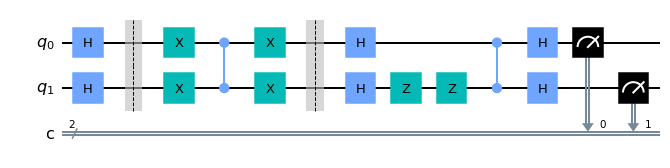

In [11]:
#Adding the measurement gates:
for i in range(n):
    grover_00.measure(i, i)


#Draw a circuit:
grover_00.draw()
    


In [12]:
### Step 5: Output time

In [13]:
### run on local simulator

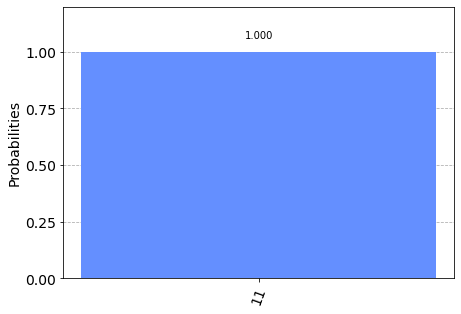

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

#Get the result of execution 
results = execute(grover_00, backend = backend, shots = shots).result()

#Retrive the data
data  = results.get_counts()

#Plot histoogram
plot_histogram(data)


In [15]:
### Run on a actual quantum device

In [16]:
#Get my provider
provider = IBMQ.get_provider(hub = 'ibm-q')

In [17]:
#Checking the quantum machines available:
all_providers = provider.backends()

for device in all_providers:
    print(device)

ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


In [18]:
#Define condition for machine
filters = lambda x: x.configuration().n_qubits >= n and not x.configuration().simulator and x.status().operational == True

desired_providers = provider.backends(filters = filters)
for device in desired_providers:
    print(device)

ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_manila


In [19]:
#Initialize the quantum device:
qcomp = least_busy(provider.backends(filters = filters))

print(f"The least busy device: {qcomp}")

%qiskit_job_watcher

job = execute(grover_00, backend = qcomp, shots = shots)

The least busy device: ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

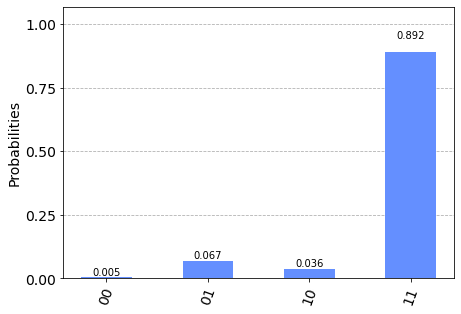

In [20]:
qcomp = provider.get_backend('ibmq_lima')
job = execute(grover_00, backend = qcomp, shots = shots)

result = job.result()
data = result.get_counts()
plot_histogram(data)


In [21]:
## Cricuit for winning state 10:

In [22]:
### Step 1: Step Preparation:

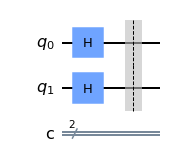

In [23]:
grover_10 = QuantumCircuit(n, n)

for qubit in range(n):
    grover_10.h(qubit)
    
#Add a barrier:
grover_10.barrier()

#Draw the Circuit:
grover_10.draw()

In [24]:
### Step 2: Design the phase oracle:

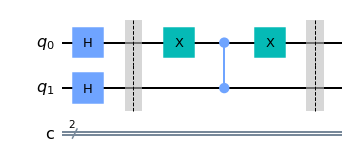

In [25]:
#Apply the X gate to the LSB:
grover_10.x(0)

#Apply the CZ gate:
grover_10.cz(1, 0)

#Applying the X gate to reset the LSB:
grover_10.x(0)

#Add a barrier:
grover_10.barrier()

#Draw the Circuit:
grover_10.draw()

In [26]:
### Step 3: Design the Diffuser:

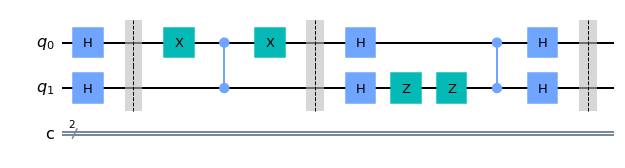

In [27]:
#Applying a H gate
for qubit in range(n):
    grover_10.h(qubit)
    
#Apply the Z gate:
for qubitGrove in range(n):
    grover_10.z(qubit)
    
#Apply the CZ gate:
grover_10.cz(1, 0)

#Apply the H gates:
for qubit in range(n):
    grover_10.h(qubit)
    
#Add a barrier:
grover_10.barrier()

#Draw the Circuit:
grover_10.draw()

In [28]:
### Step 4 :Measure the qubits:

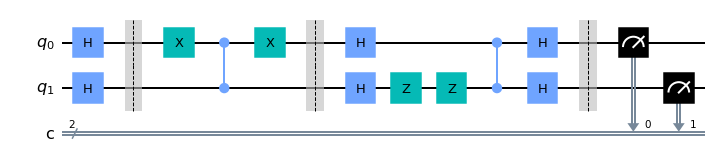

In [29]:
#Add the measurement gate:
for i in range(n):
    grover_10.measure(i, i)

#Draw the circuit:
grover_10.draw()

In [30]:
#Step 5: Get the results!

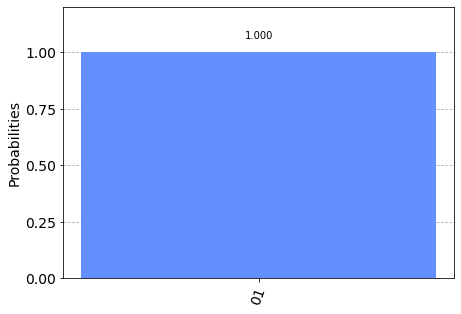

In [31]:
backend = BasicAer.get_backend('qasm_simulator')

result = execute(grover_10, backend = backend, shots = shots).result()
data = result.get_counts()

#Plot the data
plot_histogram(data)

In [32]:
job = execute(grover_10, backend = qcomp, shots = shots)

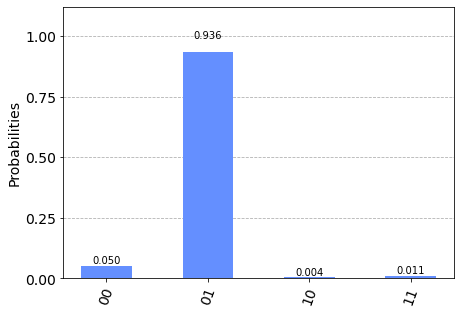

In [33]:
result = job.result()
data = result.get_counts()
plot_histogram(data)

In [34]:
#Generalized Grover's Search :

In [35]:
def phase_oracle(n, indices_to_mark, name = "Phase Oracle"):
    '''
    Breif: Generate the oracle matrix to flip the phase of marked elements.
    Parameters:
        N = Integer , The number of qubits.
        indices_to_mark = List of integersrepresenting the indices of winning elements.
        name = String. The name we give to our circuit.
        return: phase oracle
    '''
    qc = QuantumCircuit(n, name= name)
    oracle_matrix = np.identity(2 ** n)#getting the identity matrix of order 2^n.
    
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1 #Flipping the signs of the keys
        
    qc.unitary(oracle_matrix, range(n))#Apply the matrix to the circut as a unitary gate
                                    #with the range of qubits being from [0, .....n-1]
    return qc

In [36]:
def diffuser(n, name = "Diffuser"):
    '''
    
    Breif : Prepare the diffuser circuit by generating the matrix that flips the phase of all state except for the state |00.....0_n>
    Parameters:
        n = Integer, The number of qubits.
        name = String. The name we give to the diffuser circicuit
        return: the diffuser circuit
    '''
    all_num = list(range(2**n))#[0,1....2^n-1]
    execupt_zero = all_num[1: ]#Removing 0 from the list of all numbers.
    
    qc = QuantumCircuit(n, name = name)
    
    #Applying the H gate:
    qc.h(range(n))
    
    #Genenrate the diffuser matrix:
    diffuser_matrix = phase_oracle(n, except_zero)
    
    #Append the diffuser matrix to the circuit:
    qc.append(diffuser_matrix, range(n))
    
    #Applying the H gates:
    qc.h(range(n))
    
    return qc

In [37]:
def groverSearch(n, marked):
    '''
    Breif: Prepares the entire circuit for implementing Grover's search.
    Parameters:
        n = Integer. The number of qubits.
        marked = List of keys(integers).
    return: The final Grover's search Circuit.
    '''
    qc = QuantumCircuit(n, n)
    M = len(marked)
    N = 2 ** n
    
    theta = 2 * np.arcsin(np.sqrt(M/N))
    rounds = int(np.ceil((np.pi / (2 * theta)) - (1 / 2)))
    
    #Print the information that we have:
    print(f"Number of qubits:{n}")
    print(f"Key(s) to search {marked}")
    print(f"Number of rounds needed: {rounds}")
    
    
    #Step1: Prepare the supeposition states:
    qc.h(range(n))
    
    for _ in range(rounds):
        #Step 2 : Applying the phase oracle
        qc.append(phase_oracle(n, marked), range(n))
        #Step 3:
        qc.append(diffuser(n),range(n))
        
    qc.measure(range(n), range(n))
    return qc

In [38]:
n = int(input("Enter the number of qubits:="))
marked = list(map(int, input("Enter the marked elements").split()))
marked

Enter the number of qubits:= 3
Enter the marked elements 6 1


[6, 1]

In [39]:
gen_grover = groverSearch(n, marked)

Number of qubits:3
Key(s) to search [6, 1]
Number of rounds needed: 1
Traceback (most recent call last):
  File "/tmp/ipykernel_807/3293796436.py", line 1, in <module>
    gen_grover = groverSearch(n, marked)
  File "/tmp/ipykernel_807/3023181246.py", line 29, in groverSearch
    qc.append(diffuser(n),range(n))
  File "/tmp/ipykernel_807/3018930347.py", line 19, in diffuser
    diffuser_matrix = phase_oracle(n, except_zero)
NameError: name 'except_zero' is not defined

Use %tb to get the full traceback.


In [40]:
gen_grover.draw()

Traceback (most recent call last):
  File "/tmp/ipykernel_807/751841960.py", line 1, in <module>
    gen_grover.draw()
NameError: name 'gen_grover' is not defined

Use %tb to get the full traceback.


In [41]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(gen_grover, backend = backend, shots = shots).result()
counts = result.get_counts()
plot_histogram(counts)

Traceback (most recent call last):
  File "/tmp/ipykernel_807/1855578582.py", line 2, in <module>
    result = execute(gen_grover, backend = backend, shots = shots).result()
NameError: name 'gen_grover' is not defined

Use %tb to get the full traceback.
